In [206]:
# Import all the necessary files
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.signal import lfilter
from scipy.signal import correlate


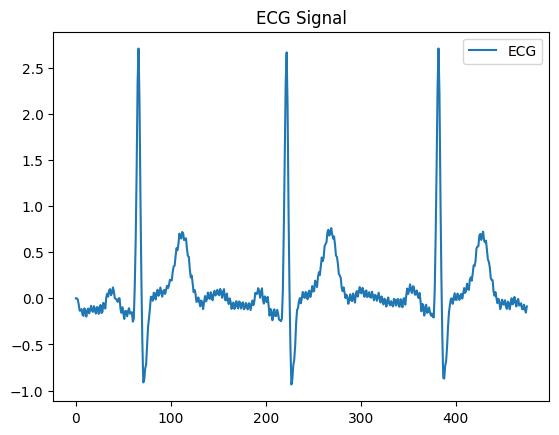

In [207]:
# Loading the ECG signal
ecg = np.genfromtxt('ecg2x60.dat')
fs = 1000       # Sampling Frequency
L = len(ecg)    # length of ECG signal
t = np.arange(1, L + 1) / fs    # Time sampling

# Plotting the ECG Signal
plt.plot(ecg, label = 'ECG')
plt.title('ECG Signal')
plt.legend()
plt.show()

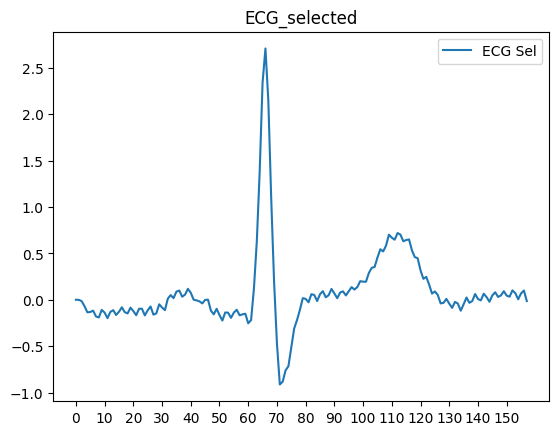

In [208]:
ticks = [10 * i for i in range(16)]

ecg_sel = ecg[0:158]
plt.plot(ecg_sel, label = 'ECG Sel')
plt.title('ECG_selected')
plt.legend()
plt.xticks(ticks= ticks)
plt.show()

In [209]:
x = np.array([0, 10, 32, 45, 60, 65, 68, 70, 75, 83, 100, 108, 113, 120, 140, 157])
y = [ecg_sel[i] for i in x]

In [210]:
len(ecg_sel)

158

In [211]:
def gen_piece_wise_ecg(x, y):
    linModel = []

    for i in range(len(x) - 1):
        if y[i + 1] == y[i]:
            a = y[i] * np.ones(x[i + 1] - x[i])

        else:
            a = y[i] + (y[i + 1] - y[i]) / (x[i + 1] - x[i]) * np.arange(x[i + 1] - x[i])
        
        linModel.extend(a[:-1])
        linModel.append(a[-1])

        fs = 100
        t1 = np.arange(len(linModel)) / fs

    return t1, linModel


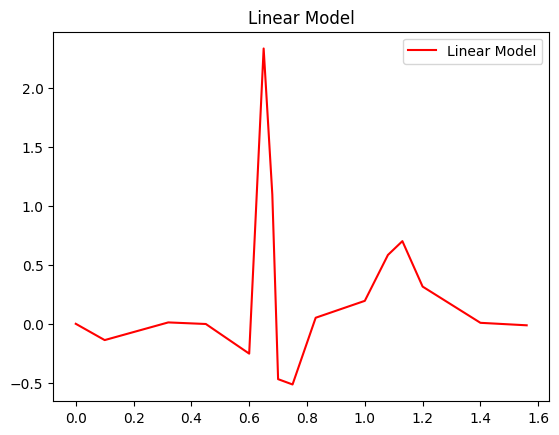

In [212]:
time, linModel = gen_piece_wise_ecg(x = x,
                                    y = y)
plt.plot(time, linModel, label = 'Linear Model', color = 'r')
plt.title('Linear Model')
plt.legend()
plt.show()

In [213]:
len(linModel), len(ecg_sel)
ecg_sel = ecg_sel[:157]
len(linModel), len(ecg_sel)

(157, 157)

In [214]:
# Now let us write a function for performing correlation
def corr(X, Y, length_filter = 9):
    Nh = length_filter
    Ns = len(X)
    rxy = correlate(X, Y, mode ='full')
    rxy = rxy[Ns - 1: Ns - 1 + Nh ]
    return rxy

In [215]:
# Now let us write function for wiener filter
def wiener(cleaned_signal, observed):
    rxx = corr(X = cleaned_signal, 
               Y = cleaned_signal)
    
    rxy = corr(X = cleaned_signal,
               Y = observed)
    
    Rxx = toeplitz(rxx)
    Rxx_inv = np.linalg.inv(Rxx)
    w1 = np.linalg.solve(Rxx_inv, rxy)

    y = lfilter(w1, 1, linModel)
    return y

In [216]:
filtered_signal = wiener(cleaned_signal= linModel,
                         observed = ecg_sel)

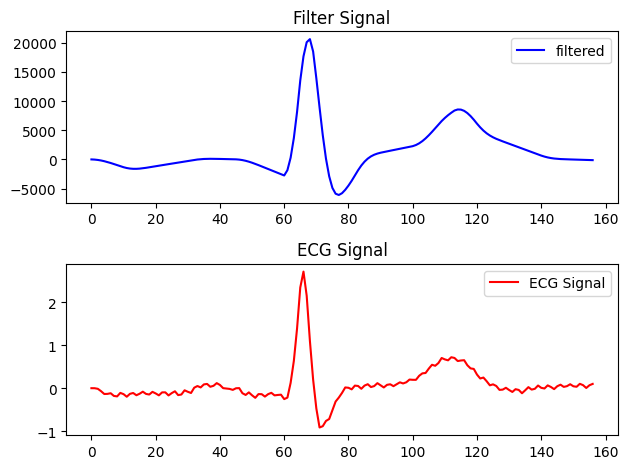

In [217]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(filtered_signal, label = 'filtered', color = 'b')
plt.title('Filter Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ecg_sel, label = 'ECG Signal', color = 'r')
plt.title('ECG Signal')
plt.legend()

plt.tight_layout()
plt.show()